In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
# Featue scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Build Hierarchical Cluster

In [6]:
import scipy.cluster.hierarchy as sch

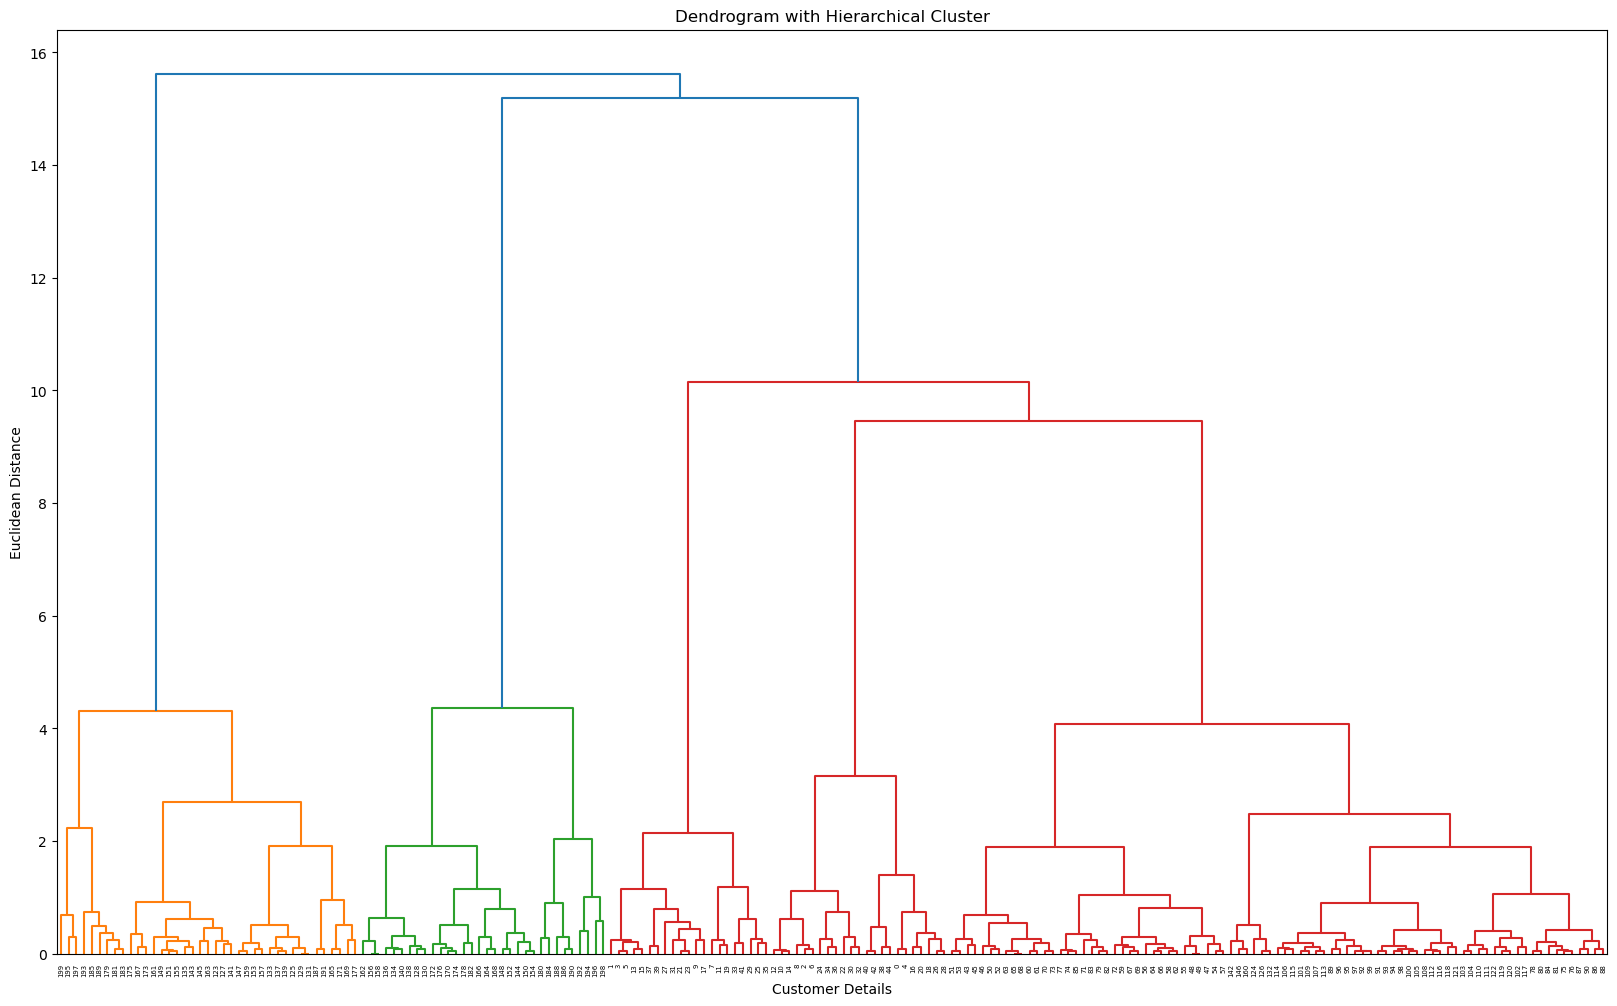

In [9]:
plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(sc_x, method='ward'))
plt.title("Dendrogram with Hierarchical Cluster")
plt.xlabel("Customer Details")
plt.ylabel("Euclidean Distance")
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward' )
hcluster

AgglomerativeClustering(n_clusters=5)

In [12]:
y_hcluster = hcluster.fit_predict(sc_x)
y_hcluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [13]:
combined_cluster = pd.concat([df, pd.DataFrame(y_hcluster)], axis=1)
combined_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


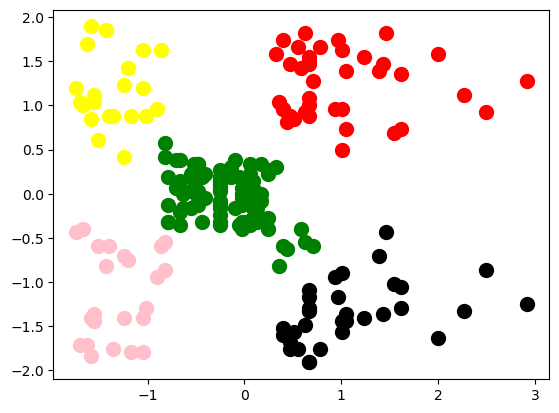

In [14]:
# visualization
plt.scatter(sc_x[y_hcluster==0,0], sc_x[y_hcluster==0,1], s=100, c='black', label='H_Cluster1')
plt.scatter(sc_x[y_hcluster==1,0], sc_x[y_hcluster==1,1], s=100, c='red', label='H_Cluster2')
plt.scatter(sc_x[y_hcluster==2,0], sc_x[y_hcluster==2,1], s=100, c='green', label='H_Cluster3')
plt.scatter(sc_x[y_hcluster==3,0], sc_x[y_hcluster==3,1], s=100, c='yellow', label='H_Cluster4')
plt.scatter(sc_x[y_hcluster==4,0], sc_x[y_hcluster==4,1], s=100, c='pink', label='H_Cluster5')

plt.show()

In [15]:
combined_cluster.to_csv("final_report_h_cluster.csv")

# DBSCAN Clustering intution

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
x = np.array([[1,2],[3,4],[8,9],[7,8],[50,90]])

In [18]:
x 

array([[ 1,  2],
       [ 3,  4],
       [ 8,  9],
       [ 7,  8],
       [50, 90]])

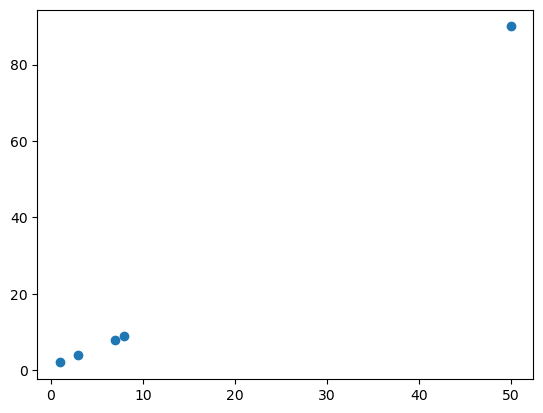

In [19]:
plt.scatter(x[:,0], x[:,1])

In [34]:
clustering = DBSCAN(eps=3, min_samples=4)
clustering.fit(x)

DBSCAN(eps=3, min_samples=4)

In [35]:
cluster = clustering.labels_

In [36]:
cluster

array([-1, -1, -1, -1, -1], dtype=int64)

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(x, cluster)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [25]:
clustering

array([-1, -1, -1, -1, -1], dtype=int64)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [29]:
kmeans.labels_

array([1, 1, 1, 1, 0])

In [30]:
kmeans.cluster_centers_

array([[50.  , 90.  ],
       [ 4.75,  5.75]])

In [ ]:
kmeans.